# Bayes and k-NN classifiers
### Aidin Hosseini 98103115

### tasks:
1. [Import Iris dataset with pandas and show the first rows](#importing-iris-dataset)
1. ~~If it's needed pre-process the data~~
1. [Create a bayes classifier which each class distribution is Guassian](#gaussian-naive-bayes-classifier)
1. [Confusion matrix for naive bayes classifier](#confusion-matrix-for-naive-bayes-classifier)
1. [Create a k-NN classifier](#k-nn-classifier)
1. [Confusion matrix for k-NN classifier](#comparison-between-classifiers)
1. [Comparing classifiers](#comparison-between-classifiers)
1. [Conclusion](#conclusion)

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
import seaborn as sns

In [86]:
# this makes the plots interactive
# if you don't have it, you can comment it out
%matplotlib widget

## Importing Iris dataset
Cell below uses **datasets** from **sklearn** to get the iris dataset. Splits the dataset (test dataset size is 20%) using **train_test_split** from **sklearn.model_selection**. 

In [87]:
# importing iris dataset from sklearn
iris_dataset,iris_class = datasets.load_iris(return_X_y=True)
#spliting the dataset into train and test set
train_set, test_set, train_class, test_class = train_test_split(iris_dataset, iris_class, test_size=0.2,random_state = 5)
# converting the dataset into dataframe
train_set_df = pd.DataFrame(train_set,columns=['sepal_length','sepal_width','petal_length','petal_width'])
train_class_df= pd.DataFrame(train_class,columns=['class'])

train_df = pd.concat([train_set_df,train_class_df],axis=1)
test_set_df = pd.DataFrame(test_set,columns=['sepal_length','sepal_width','petal_length','petal_width'])
test_class_df= pd.DataFrame(test_class,columns=['class'])

test_df = pd.concat([test_set_df,test_class_df],axis=1)
# printing the train and test set
print('train dataframe: ')
print(train_df.head())
print('\ntest dataframe: ')
print(test_df.head())

train dataframe: 
   sepal_length  sepal_width  petal_length  petal_width  class
0           5.1          3.4           1.5          0.2      0
1           5.5          2.3           4.0          1.3      1
2           5.7          2.6           3.5          1.0      1
3           5.4          3.7           1.5          0.2      0
4           7.0          3.2           4.7          1.4      1

test dataframe: 
   sepal_length  sepal_width  petal_length  petal_width  class
0           5.8          2.7           3.9          1.2      1
1           6.1          2.6           5.6          1.4      2
2           5.8          2.8           5.1          2.4      2
3           4.4          3.2           1.3          0.2      0
4           7.2          3.6           6.1          2.5      2


In [88]:
train_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [89]:
test_df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

## Gaussian Naive Bayes classifier
the code below is a **gussian naive bayes** classifier. You can create an object from this class and fit your model into it using fit function.<br>
After that you can use predict function to test your model with test set. <br>

1. fit:<br>
    &nbsp; In this function variance,mean and priority of each class is calculated.<br>
    <span style="color:orange">&nbsp; Classes has to be included in the last column of the dataframe</span>
1. predict:<br>
    &nbsp; Uses the formula below to calculate which class the training set should be assigned to.<br>
    <span style="color:orange">&nbsp; Classes has to be included in the last column of the dataframe</span>
    $$\begin{align}\begin{aligned}\hat{y} = \arg\max_y \log(P(y)) + \sum_{i=1}^{n} \log(P(x_i \mid y)),\end{aligned}\end{align}$$
1. log_likelihood:<br>
    &nbsp; In this function for each entry test, we calculate the log likelihood for each parameter. then we add the log likelihood of parameters together.
$$\log(P(x_i \mid y)) = -0.5*\log{2\pi\sigma^2_y} -\left(\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)$$



In [90]:
class guassian_naive_bayes():

    classes : np.ndarray
    var : np.ndarray
    mean : np.ndarray
    prior : np.ndarray
    initialized : bool = False

    def fit(self, train_set : pd.DataFrame):
        # grouping by classes
        grouped_df = train_set.groupby('class')
        
        # number of the inputs
        n_total = train_set.shape[0]
        
        # finding how many classes are in the dataframe
        self.classes = np.array(list(grouped_df.groups.keys()))
        
        # initializing the matrices
        self.var = np.zeros((len(self.classes), train_set.shape[1]-1))
        self.mean = np.zeros((len(self.classes), train_set.shape[1]-1))
        self.prior = np.zeros(len(self.classes))
        
        #finding variance, mean and prior of each class
        for i, class_ in enumerate(self.classes):
            group = grouped_df.get_group(class_).iloc[:,:-1]
            self.var[i] = np.var(group,axis=0)
            self.mean[i] = np.mean(group,axis=0)
            self.prior[i] = group.shape[0]/n_total

        self.initialized = True
        return
    
    
    def predict(self, test_set : pd.DataFrame):
        if not self.initialized:
            raise Exception('Model is not initialized')
        
        #converting the dataframe to numpy array
        test_set1 = test_set.to_numpy()
        
        #finding the log likelihood of each class
        log_likelihood_result = self.log_likelihood(test_set1)

        return self.classes[np.argmax(log_likelihood_result, axis=1)]

    def log_likelihood(self, test_data : np.ndarray):
        log_likelihood_result =  []
        for i, class_ in enumerate(self.classes):
            log_prior = np.log(self.prior[i])
            res = -0.5*np.sum(np.log(2*np.pi*self.var[i])) - np.sum(((test_data - self.mean[i])**2)/(2*self.var[i]),1)
            log_likelihood_result.append(res+log_prior)
        
        return np.array(log_likelihood_result).T
        


the section below creates an object from the gussian_naive_bayes and fits the data into it </br>
variance, mean and prior of each class is calculated.

In [91]:
#creating an object and fitting the data
gnb = guassian_naive_bayes()
gnb.fit(train_df) 

print('variance of each parameter in the class:\n ',gnb.var,'\n')
print('mean of each parameter in the class:\n ',gnb.mean,'\n')
print('prior of each parameter in the class:\n ',gnb.prior,'\n')

variance of each parameter in the class:
  [[0.13234127 0.1486678  0.03200113 0.00955215]
 [0.28036818 0.10762656 0.22198554 0.03752794]
 [0.42983563 0.10624589 0.32742932 0.06222222]] 

mean of each parameter in the class:
  [[5.01666667 3.4547619  1.4547619  0.24047619]
 [5.97435897 2.74871795 4.25128205 1.31282051]
 [6.58717949 2.98717949 5.53589744 2.03333333]] 

prior of each parameter in the class:
  [0.35  0.325 0.325] 



Cell below calculates the accuracy of the model for the training set.

In [92]:
train_prediction = gnb.predict(train_df.iloc[:,:-1])

#finding the accuracy of the model

print('accuracy of the model on train set: ',np.sum(train_df.iloc[:,-1]==train_prediction)/train_prediction.shape[0])

train_prediction

accuracy of the model on train set:  0.975


array([0, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 2, 1, 2, 2, 0, 2, 0,
       0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 2, 1, 0, 1, 0, 2, 2, 1, 2, 1, 2, 1,
       1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 1, 0, 0, 2, 1,
       1, 0, 0, 2, 1, 1, 0, 1, 2, 1, 0, 1, 2, 2, 2, 2, 0, 0, 1, 2, 0, 1,
       0, 0, 2, 1, 2, 0, 2, 0, 2, 0, 1, 0, 2, 2, 0, 1, 2, 2, 1, 0, 1, 0,
       0, 1, 2, 0, 2, 0, 1, 2, 2, 1])

Cell below uses the guassian naive bayes class prediction function to classify the test dataframe. Also accuray of the model is calculated.

In [93]:
prediction = gnb.predict(test_df.iloc[:,:-1])

#finding the accuracy of the model
print('accuracy of the model on test set: ',np.sum(test_df.iloc[:,-1]==prediction)/prediction.shape[0])

prediction

accuracy of the model on test set:  0.9


array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2])

### Confusion matrix for Naive Bayes Classifier
    the cell below uses confusion_matrix from sklearn.metrics to calculate the confusion matrix.

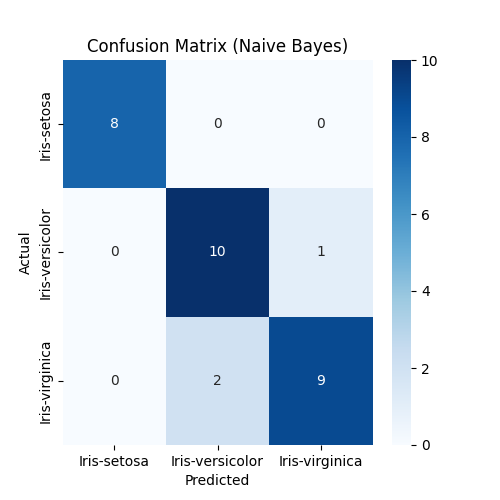

In [94]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(test_df.iloc[:,-1],prediction), annot=True, fmt='d', cmap='Blues', ax=ax)
plt.title('Confusion Matrix (Naive Bayes)')
plt.xticks(np.arange(3)+0.5, ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.yticks(np.arange(3)+0.5, ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## k-NN classifier
The block below is a class which classifies depending on k nearest neighbors. In creating an object the training set & value of k has to be initialized! <br>
the **private** function ``__get_k_nearest_neighbors`` returns the indices of the k nearest neighbors.<br>
the **private** function ``__get_class`` uses the sorted array to classify the data.<br>
the ``predict`` function gets a test dataframe and classifies it. <br>
<span style="color:orange">Classes has to be included in the last column of the dataframe</span>

In [95]:
class k_nearest_neighbor_classifier():
    k : int
    train_df : pd.DataFrame
    classes : np.ndarray
    
    def __init__(self, k : int,train_df : pd.DataFrame):
        self.k = k
        self.train_df = train_df
        self.classes = np.array(list(train_df.groupby('class').groups.keys()))
    
    
    def __get_k_nearest_neighbors(self, test_data : np.ndarray):
        distances = np.array([])
        for i in range(self.train_df.shape[0]):
            distances = np.append(distances,np.linalg.norm(test_data-self.train_df.iloc[i,:-1]))
        return np.argsort(distances)[:self.k]
    
    def __get_class(self, sorted_array : np.ndarray):
        class_count = np.zeros(len(self.classes))
        for i in sorted_array:
            class_count[self.classes==self.train_df.iloc[i,-1]]+=1
        return self.classes[np.argmax(class_count)]

    def predict(self, test_df:pd.DataFrame):
        prediction = np.array([])
        for i in range(test_df.shape[0]):
            prediction = np.append(prediction,self.__get_class(self.__get_k_nearest_neighbors(test_df.iloc[i,:-1]))) # type: ignore
        return prediction
    
    


### k-NN (k=1)
the cell below classifies the test dataframe. Also the accuracy of the model is calculated.

In [96]:
knn = k_nearest_neighbor_classifier(1,train_df)
prediction1 = knn.predict(test_df)

print('accuracy of the model on test set: ',np.sum(test_df.iloc[:,-1]==prediction1)/prediction1.shape[0])

prediction1


accuracy of the model on test set:  0.9


array([1., 2., 2., 0., 2., 1., 0., 2., 0., 1., 1., 1., 2., 2., 0., 0., 2.,
       2., 0., 0., 1., 2., 0., 2., 1., 2., 1., 1., 1., 2.])

### Confusion matrix for k-NN (k=1)

C:\Users\aidin\AppData\Local\Temp\ipykernel_8856\744567359.py:1: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(5,5))


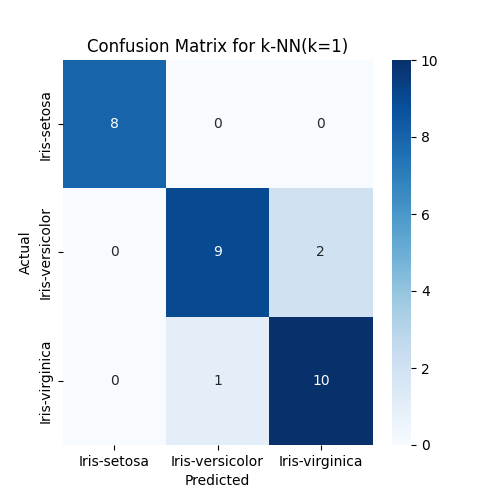

In [97]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(test_df.iloc[:,-1],prediction1), annot=True, fmt='d', cmap='Blues', ax=ax)
plt.title('Confusion Matrix for k-NN(k=1)')
plt.xticks(np.arange(3)+0.5, ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.yticks(np.arange(3)+0.5, ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### k-NN (k=3)
the cell below classifies the test dataframe. Also the accuracy of the model is calculated.

In [98]:
knn = k_nearest_neighbor_classifier(3,train_df)
prediction3 = knn.predict(test_df)

print('accuracy of the model on test set: ',np.sum(test_df.iloc[:,-1]==prediction3)/prediction3.shape[0])

prediction3

accuracy of the model on test set:  0.9333333333333333


array([1., 2., 2., 0., 2., 1., 0., 2., 0., 1., 1., 2., 2., 2., 0., 0., 2.,
       2., 0., 0., 1., 2., 0., 2., 1., 2., 1., 1., 1., 2.])

### Confusion matrix for k-NN (k=3)

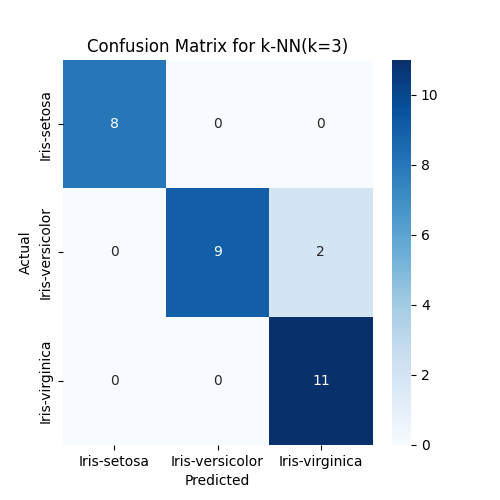

In [99]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(test_df.iloc[:,-1],prediction3), annot=True, fmt='d', cmap='Blues', ax=ax)
plt.title('Confusion Matrix for k-NN(k=3)')
plt.xticks(np.arange(3)+0.5, ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.yticks(np.arange(3)+0.5, ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### k-NN (k=5)
the cell below classifies the test dataframe. Also the accuracy of the model is calculated.

In [100]:
knn = k_nearest_neighbor_classifier(5,train_df)
prediction5 = knn.predict(test_df)

print('accuracy of the model on test set: ',np.sum(test_df.iloc[:,-1]==prediction5)/prediction5.shape[0])

prediction5

accuracy of the model on test set:  0.9333333333333333


array([1., 2., 2., 0., 2., 1., 0., 2., 0., 1., 1., 2., 2., 2., 0., 0., 2.,
       2., 0., 0., 1., 2., 0., 2., 1., 2., 1., 1., 1., 2.])

### Confusion matrix for k-NN (k=5)

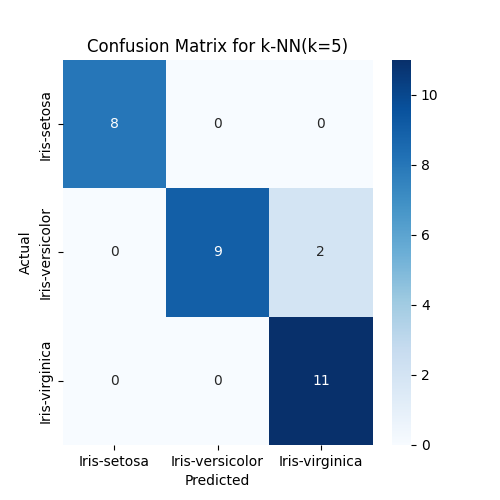

In [101]:
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(confusion_matrix(test_df.iloc[:,-1],prediction5), annot=True, fmt='d', cmap='Blues', ax=ax)
plt.title('Confusion Matrix for k-NN(k=5)')
plt.xticks(np.arange(3)+0.5, ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.yticks(np.arange(3)+0.5, ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


### Comparison between classifiers

In [102]:
# compare the accuracy of the models
print('accuracy of the bayes model on test set: ',np.sum(test_df.iloc[:,-1]==prediction)/prediction.shape[0])
print('accuracy of the k-NN (k=1) model on test set: ',np.sum(test_df.iloc[:,-1]==prediction1)/prediction1.shape[0])
print('accuracy of the k-NN (k=3) model on test set: ',np.sum(test_df.iloc[:,-1]==prediction3)/prediction3.shape[0])
print('accuracy of the k-NN (k=5) model on test set: ',np.sum(test_df.iloc[:,-1]==prediction5)/prediction5.shape[0])

accuracy of the bayes model on test set:  0.9
accuracy of the k-NN (k=1) model on test set:  0.9
accuracy of the k-NN (k=3) model on test set:  0.9333333333333333
accuracy of the k-NN (k=5) model on test set:  0.9333333333333333


In [103]:
# print f1 scores of the models
print('f1 score of the bayes model on test set: ',f1_score(test_df.iloc[:,-1],prediction,average='macro'))
print('f1 score of the k-NN (k=1) model on test set: ',f1_score(test_df.iloc[:,-1],prediction1,average='macro'))
print('f1 score of the k-NN (k=3) model on test set: ',f1_score(test_df.iloc[:,-1],prediction3,average='macro'))
print('f1 score of the k-NN (k=5) model on test set: ',f1_score(test_df.iloc[:,-1],prediction5,average='macro'))


f1 score of the bayes model on test set:  0.9089026915113871
f1 score of the k-NN (k=1) model on test set:  0.9089026915113871
f1 score of the k-NN (k=3) model on test set:  0.9388888888888888
f1 score of the k-NN (k=5) model on test set:  0.9388888888888888


This problem is about classifying different types of flowers. so The most important concept to compare the models is accuracy. based on the results that are shown above knn model with k=3 & k=5 are better classiffiers. With different shuffling of data, results are different, Althogh It seems with higher k value, results are improved. <br>
Based on the f1 scores & confusion matrices, we can conclude that the Naive Bayes classifier and knn (k=1) have similar results and the other classifiers are slightly more accurate.



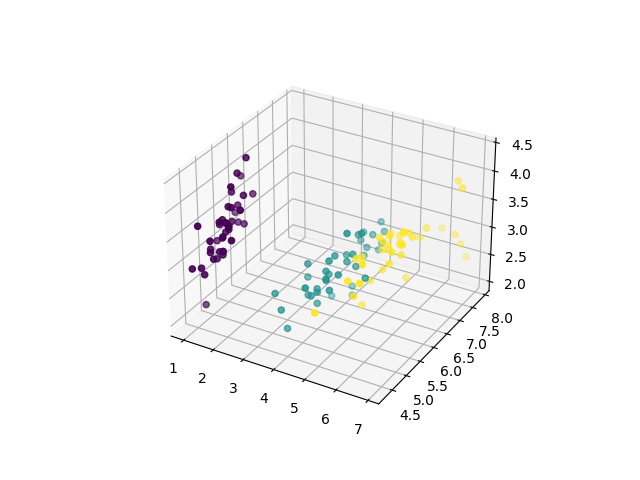

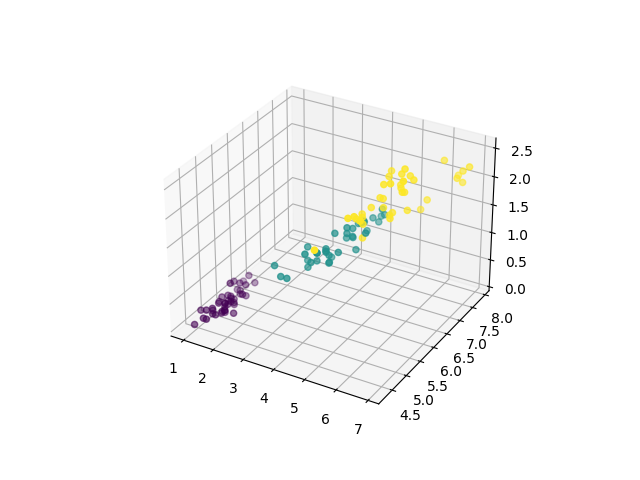

In [104]:
# make a 3d plot from train_df
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_df['petal_length'],train_df['sepal_length'],train_df['sepal_width'],c=train_df['class'])
plt.show()
#make another 3d plot from train_df including petal_width
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(train_df['petal_length'],train_df['sepal_length'],train_df['petal_width'],c=train_df['class'])

### Conclusion

as it's demonstrated above, the dataset is seperable, so k-NN (k=1) should be able to classify the <span style="color:purple">purple</span> class without any difficulties (also the other classifiers).<br>
the <span style="color:green">green</span> and <span style="color:yellow">yellow</span> class are more tangled which may cause Naive Bayes and k-NN (k=1) classifiers to miss-classify<br> the data. with higher k values it is expected to have higher accuracy as the data shows.<br>
The classification methods were tested with different shuffling of data. It can be concluded that k-NN with k=3 & k=5 have better performance overall.